# <font color='Blue'>Clustering K-Means</font>

## <font color='Blue'>Objectives</font>
    
    1. Understand the role of clusters and their importance in analytics
    2. Learn different types of clustering techniques
    3. Understand the use of distance measures such as Euclidean distance in clustering
    4. Understand how to find an optimal number of clusters in the data
    5. Learn how to build clusters using sklearn library in python

## <font color='Blue'>References</font>
  https://matplotlib.org/3.2.1/api/markers_api.html

## <font color='Blue'>Loading Libraries</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## <font color='Blue'>1.0 Clustering - Example 1</font>

## <font color='Blue'>1.1 Loading Data</font>

Let's us look at an example. We will use a small dataset of customers containing their age and income information. We can 
understand the customer segments that might exist and the key attributes of each segment

Example Data Set - Income Data. CSV

In [2]:
customers_df = pd.read_csv( "Income Data.csv" )

# Attributes - income and age
# No of records - 300
print("customers_df information")
print("_________________________________________")
print(customers_df.info())
print("_________________________________________")
print(customers_df.head(5))
print("_________________________________________")

customers_df information
_________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  300 non-null    float64
 1   age     300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB
None
_________________________________________
    income    age
0  41100.0  48.75
1  54100.0  28.10
2  47800.0  46.75
3  19100.0  40.25
4  18200.0  35.80
_________________________________________


## <font color='Blue'>2.0 Visualize the relationship between  income and age</font>

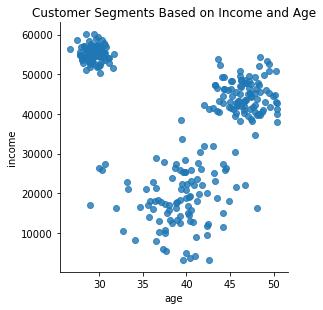

In [3]:
# For this purpose scatter plots are useful (when we have few attributes)
sn.lmplot( "age", "income", data=customers_df, fit_reg = False, size = 4 );
plt.title( "Customer Segments Based on Income and Age");

Three segments are observed from the picture

      1.On the top-left of the graph, we have low age - high income group
      2.On the top-right of the graph, we have high age - medium income group
      3.on the bottom of the graph, we have low income group spread across all ages

## <font color='Blue'>3.0 K-Means Clustering</font>

<b> Steps in k-means clustering </b>

   1. Decide the value of k (Can be fine-tuned later) 
   2. Choose k centroids randomly
   4. Assign observations to K centroids based on distance
   5. Adjust the centroid after adding new observations.
   6. Reassign the observations to the new centroid.
   7. Repeat steps 4 to 6 untill there are no more re-assignments

### <font color='Blue'>3.1 Executing K-Means</font>

In [4]:
clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(n_clusters=3)

### <font color='Blue'>3.2 Assigning Cluster Labels</font>

In [5]:
customers_df["clusterid"] = clusters.labels_
customers_df[0:5]
cluster_size = customers_df.groupby(['clusterid']).size() 
print(cluster_size)

clusterid
0     89
1     96
2    115
dtype: int64


### <font color='Blue'>3.3 Validation</font>
### <font color='Blue'>3.3.1 Validation - Silhoutee Coefficient</font>

In [6]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(customers_df, clusters.labels_))
# Silhouette score between -1 and 1

Silhouette Coefficient: 0.682


### <font color='Blue'>3.4 Plotting Results</font>

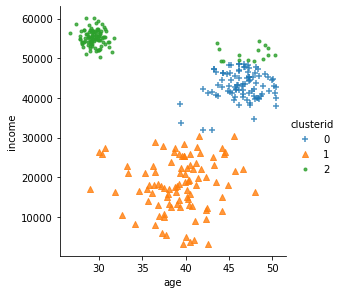

In [7]:
markers = ['+','^','.']
sn.lmplot( "age", "income",data=customers_df,hue = "clusterid",fit_reg=False,markers = markers,size = 4 );

### <font color='Blue'>3.5 Obtaining Cluster Centers and Interpretation</font>

In [8]:
result = customers_df.groupby('clusterid')['age','income'].agg( ["mean",'std'] ).reset_index() 
result['cluster_size'] = cluster_size
result 

clusterid        age                  income              cluster_size
                  mean       std          mean          std             
0         0  46.419101  2.289620  43053.932584  3613.769632           89
1         1  39.174479  3.626068  18144.791667  6745.241906           96
2         2  31.700435  6.122122  54675.652174  2362.224320          115

The clusters can be interpreted as follows

     Cluster A: Low Age (31) and High Income (55K)
     Cluster B: Mid Age (39) and Low Income  (18K)
     Cluster C: High Age (46) and Medium Income (43K)  

## <font color='Blue'>4.0 K-Means with Normalization</font>

If you look at the above solution, the clusters are mostly based on income. This is because the salary, is on a larger scale compared to the age. The scale of age is 0 to 60, while salary ranges from 0 to 50000. For example, difference in ages of 10 and 70 is significant but numerical difference is only 60. Whereas difference in salaries of 10000 and 11000 may not be significant but numerical distance is 1000. So, when distances are affected predominantly by income and not age, it is not truly reflective of the context. To overcome the magnitude effect of attributes, we use normalization.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["age", "income"]] )
print(type(scaled_customers_df))
scaled_customers_df[0:5]

<class 'numpy.ndarray'>


array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

### <font color='Blue'>4.1 Executing K-Means</font>

In [11]:
clusters_new = KMeans(3)
clusters_new.fit( scaled_customers_df )
customers_df["clusterid_new"] = clusters_new.labels_
cluster_size_new = customers_df.groupby(['clusterid_new']).size() 
print(cluster_size_new)

clusterid_new
0    100
1    103
2     97
dtype: int64


### <font color='Blue'>4.2 Validation</font>

### <font color='Blue'>4.2.1 Silhouttee Coefficient</font>

In [12]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(scaled_customers_df, clusters_new.labels_))
# Silhouette score between -1 and 1

Silhouette Coefficient: 0.739


### <font color='Blue'>4.2.2 Calinski-Harabasz Index</font>

In [13]:
# Higher the better
print("Calinski-Harabasz index: %0.3f"% metrics.calinski_harabasz_score(scaled_customers_df, clusters.labels_))

Calinski-Harabasz index: 538.472


### <font color='Blue'>4.3 Plotting the Clusters</font>

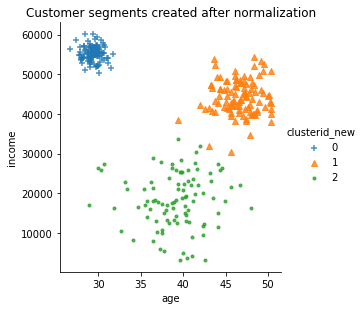

In [14]:
markers = ['+','^','.']
sn.lmplot( "age", "income",data=customers_df,hue = "clusterid_new",fit_reg=False,markers = markers,size = 4 );
plt.title( "Customer segments created after normalization");

### <font color='Blue'>4.4 Obtaining Cluster Centers and Interpretation</font>

### <font color='Blue'>4.4.1 Obtaining Cluster Centers - Normalized</font>

In [15]:
clusters.cluster_centers_

array([[4.30539326e+04, 4.64191011e+01],
       [1.81447917e+04, 3.91744792e+01],
       [5.46756522e+04, 3.17004348e+01]])

### <font color='Blue'>4.4.2 Obtaining Cluster Centers</font>

In [16]:
# del result
# del size
result1 = customers_df.groupby('clusterid_new')['age','income'].agg( ["mean",'std'] ).reset_index() 
result1['cluster_size'] = cluster_size_new
result1

clusterid_new        age                  income              cluster_size
                      mean       std          mean          std             
0             0  29.384000  0.921458  55204.000000  1951.943864          100
1             1  46.627184  2.151559  44308.737864  4390.321503          103
2             2  39.140206  3.558665  18321.649485  6924.747691           97

The clusters can be interpreted as follows

     1. Cluster A: Low Age (29) and High Income (55K)
     2. Cluster B: Mid Age (39) and Low Income  (18K)
     3. Cluster C: High Age (46) and Medium Income (44K)   

## <font color='Blue'>5.0 K-Means Example 2</font>

A company wishes to enter a beer market. Before it decides the kind of beer, it wishes to launch, it must understand 
what kinds of products already exist in the market and what kinds of segments the product address. To do that the 
company collects specification of different beer brands in the market and their corresponding features such as calories, sodium, alcohol and cost.

Use Beer dataset

In [18]:
beer_df = pd.read_csv( 'beer.csv' )
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


### <font color='Blue'>5.1 Feature Normalization</font>

In [19]:
scaled_beer_df = scaler.fit_transform( beer_df[['calories','sodium','alcohol','cost']] )

### <font color='Blue'>5.2 Executing K-Means Multiple Solutions</font>

<b> Finding the optimal number of clusters </b>

There are only guidelines regarding the optimal number of clusters and there is no precise way of estimating that.

<b> Method I - Rule of thumb </b>

    1. Size of largest cluster is not more than 80% of the data size
    2. Size of smallest cluster is not less than 25% of the largest cluster

<b> Method II - Scree Plot </b>
    
    Scree plot plots the percentage of within cluster sum-of-squares (Variance) (WSS) explained by the clusters.
    Initially increase in cluster will tend to decrease the within cluster variance a lot but eventually it will drop.
    Scree plots helps to identify the number of clusters beyond which the marginal drop is negligible

In [20]:
import collections 
def CountFrequency(arr): 
    return collections.Counter(arr)

### <font color='Blue'>5.2.1 Generating Multiple Solutions and Plotting Scree Plot</font>

Counter({0: 20})
Counter({1: 13, 0: 7})
Counter({1: 8, 0: 8, 2: 4})
Counter({1: 8, 2: 7, 0: 4, 3: 1})
Counter({0: 8, 1: 5, 2: 4, 3: 2, 4: 1})
Counter({1: 5, 3: 4, 2: 4, 0: 4, 4: 2, 5: 1})
Counter({0: 5, 1: 4, 5: 4, 2: 3, 4: 2, 3: 1, 6: 1})
Counter({6: 5, 0: 4, 1: 4, 2: 3, 3: 1, 5: 1, 4: 1, 7: 1})
Counter({0: 5, 1: 4, 2: 3, 7: 3, 3: 1, 5: 1, 8: 1, 6: 1, 4: 1})
Counter({6: 4, 1: 4, 2: 3, 9: 3, 3: 1, 0: 1, 4: 1, 7: 1, 8: 1, 5: 1})
cluster_errors: [80.0, 51.45915294696048, 27.849901261962515, 17.843594755875053, 12.388814853702117, 9.570664960279121, 7.2329082920535495, 6.067915065175508, 4.774245752244272, 3.6442052099199573]


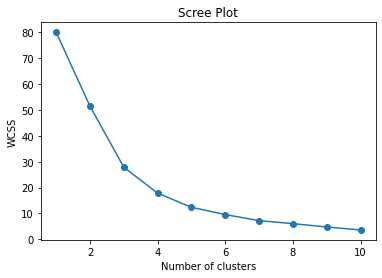

In [21]:
cluster_range = range( 1, 11 )
cluster_errors = []  # Captures WSS

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_beer_df )
    cluster_errors.append( clusters.inertia_ )
    print(CountFrequency(clusters.labels_))
   
print("cluster_errors:", cluster_errors)
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.xlabel('Number of clusters');
plt.ylabel('WCSS');
plt.title( "Scree Plot");

    Scree-plot indicates a four cluster solution.
    Size wise = cluster solutions containing either 2 or 3 clusters look good 

### <font color='Blue'>5.3 Validating 3 cluster Solution</font>

In [22]:
k = 3
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

cluster_size_beer = beer_df.groupby(['clusterid']).size() 
print(cluster_size_beer)

clusterid
0    8
1    8
2    4
dtype: int64


### <font color='Blue'>5.3.1 Silhoutte Score</font>

In [23]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(scaled_beer_df, clusters.labels_))
# Silhouette score between -1 and 1

Silhouette Coefficient: 0.458


### <font color='Blue'>5.3.2 Calinski-Harabasz index</font>

In [24]:
# Higher the better
print("Calinski-Harabasz index: %0.3f"% metrics.calinski_harabasz_score(scaled_beer_df, clusters.labels_))

Calinski-Harabasz index: 15.917


### <font color='Blue'>5.3.3 Repeating for different cluster solutions</font>

<b> Silhoutte Coefficient </b>

2 clusters: 0.331, 3 clusters: 0.458, 4 clusters: 0.475, 5 clusters: 0.444, 6 clusters: 0.365, 7 clusters: 0.338
    
<b> Calinski-Harabasz index </b>

2 clusters: 9.983, 3 clusters: 15.917, 4 clusters: 18.578, 5 clusters: 20.465, 6 clusters: 20.605, 7 clusters: 21.314

<b> Judging the clusters </b>
    
    First look at cluster sizes
    Then look at screen plot
    Once you have sufficiently narrow down candidate solutions based on cluster sizes, then use scree plot, silhoutte  coefficient and calinski-harabasz index as guides. Use your domain knowledge. There is no measure that can tell you which is the best solution

### <font color='Blue'>5.4 Obtaining Cluster Centers and Interpreting the clusters</font>

In [24]:
# del result
# del size
result_beer = beer_df.groupby('clusterid')['calories','sodium','alcohol','cost'].agg( ["mean"] ).reset_index() 
result_beer['cluster_size'] = cluster_size_beer
result_beer

,clusterid,calories,sodium,alcohol,cost,cluster_size
,,mean,mean,mean,mean,
0,0,148.375,21.125,4.7875,0.4075,8
1,1,105.375,10.875,3.3250,0.4475,8
2,2,155.250,10.750,4.9750,0.7625,4


In [26]:
# Looking the beers belonging to a cluster "0"
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
16,Hamms,139,19,4.4,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


In [27]:
# Looking the beers belonging to a cluster "1"
beer_df[beer_df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
11,Coors_Light,102,15,4.1,0.46,1
12,Michelob_Light,135,11,4.2,0.50,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1


In [28]:
# Looking the beers belonging to a cluster "2"
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


<b> Interpretation </b>

    Cluster "A" - Low calorie, Low sodium, low alcohol, medium cost beers
    Cluster "B" - Medium calorie and alcohol content, low cost beers
    Cluster "C" - High calories, high alcohol content, low sodium expensive beers